In [23]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

In [24]:
N_regimes = 3
start_time = None

In [25]:
kor = pd.read_csv('Composite leading indicator_kor.csv', index_col=0, parse_dates=True ) #인덱스 불러오기
usa = pd.read_csv('Composite leading indicator.csv', index_col=0, parse_dates=True )

In [26]:
#normalize
kor['value'] =( kor['value'] - kor['value'].mean() ) / kor['value'].std()
usa['value'] =( usa['value'] - usa['value'].mean() ) / usa['value'].std()
print(kor)
print(usa)

               value
time                
1990-01-01  0.094932
1990-02-01  0.023641
1990-03-01 -0.013528
1990-04-01 -0.047739
1990-05-01 -0.097300
...              ...
2022-02-01 -0.149391
2022-03-01 -0.268033
2022-04-01 -0.386924
2022-05-01 -0.506175
2022-06-01 -0.630544

[390 rows x 1 columns]
               value
time                
1955-01-01  0.992076
1955-02-01  1.228729
1955-03-01  1.424447
1955-04-01  1.561836
1955-05-01  1.640568
...              ...
2022-02-01 -0.023885
2022-03-01 -0.115048
2022-04-01 -0.210998
2022-05-01 -0.313676
2022-06-01 -0.416662

[810 rows x 1 columns]


<AxesSubplot:title={'center':'Korea Leading indicator'}, xlabel='time'>

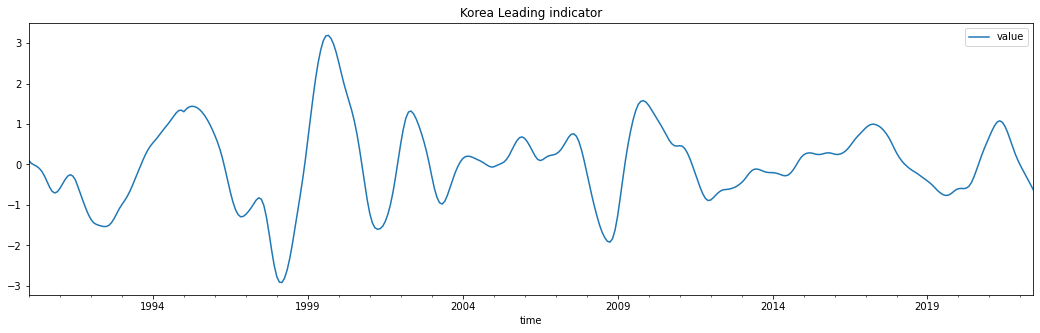

In [27]:
kor.plot(title='Korea Leading indicator', figsize=(18, 5)) 

<AxesSubplot:title={'center':'USA Leading indicator'}, xlabel='time'>

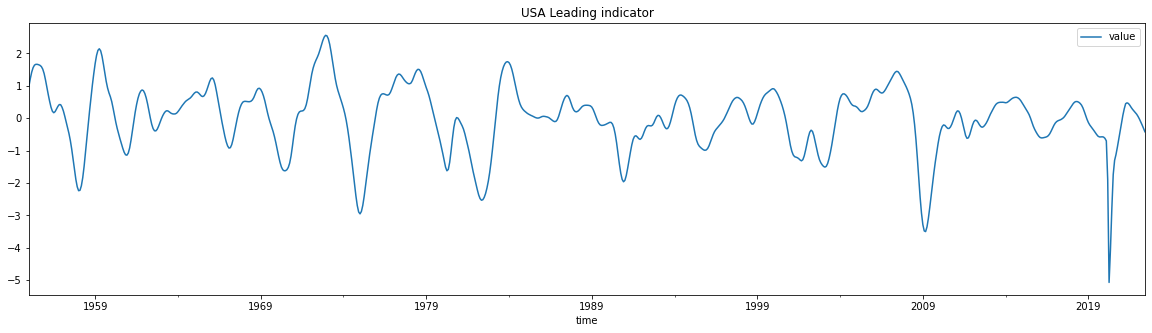

In [28]:
usa.plot(title='USA Leading indicator', figsize=(20, 5)) 

In [29]:
adfuller(kor.dropna())

(-5.968440224798,
 1.9622173866216583e-07,
 4,
 385,
 {'1%': -3.4474498334928687,
  '5%': -2.8690765390453703,
  '10%': -2.570784795075055},
 -2004.0400383400543)

In [30]:
adfuller(usa.dropna())

(-7.9043526807855615,
 4.10448037402256e-12,
 5,
 804,
 {'1%': -3.4385095783477877,
  '5%': -2.865141527500859,
  '10%': -2.5686877783346946},
 -705.0588007416275)

In [31]:
#Korea 부터

In [32]:
kor_model = sm.tsa.MarkovRegression(kor.dropna(), k_regimes=N_regimes, trend='nc', switching_variance=True)
kor_model_fit = kor_model.fit()
kor_model_fit.summary()

C:\Users\WJ\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:821: FutureWarning: trend 'nc' has been renamed to 'n' after 0.14 is released. Use 'n' now to avoid this warning.
  warnings.warn(
C:\Users\WJ\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                        Markov Switching Model Results                        
==============================================================================
Dep. Variable:                  value   No. Observations:                  390
Model:               MarkovRegression   Log Likelihood                -434.499
Date:                Wed, 27 Jul 2022   AIC                            886.997
Time:                        15:54:45   BIC                            922.692
Sample:                    01-01-1990   HQIC                           901.147
                         - 06-01-2022                                         
Covariance Type:               approx                                         
                             Regime 0 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0403      0.008      5.105      0.000       0.025       0.056
                             Regime 1 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.4039      0.060      6.775      0.000       0.287       0.521
                             Regime 2 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         2.3686      0.327      7.240      0.000       1.727       3.010
                         Regime transition parameters                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
p[0->0]        0.9310      0.000   3230.478      0.000       0.930       0.932
p[1->0]        0.0394      0.018      2.206      0.027       0.004       0.074
p[2->0]     1.564e-13        nan        nan        nan         nan         nan
p[0->1]        0.0690   9.45e-05    730.975      0.000       0.069       0.069
p[1->1]        0.9350      0.023     40.166      0.000       0.889       0.981
p[2->1]        0.0360      0.020      1.813      0.070      -0.003       0.075
==============================================================================

Warnings:
[1] Covariance matrix calculated using numerical (complex-step) differentiation.
"""

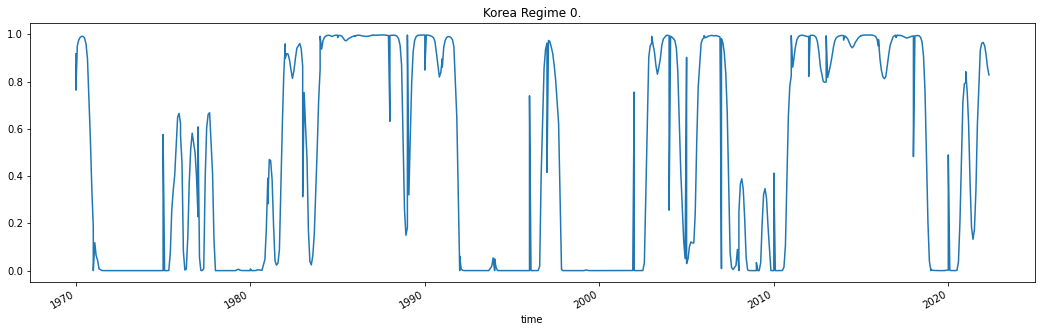

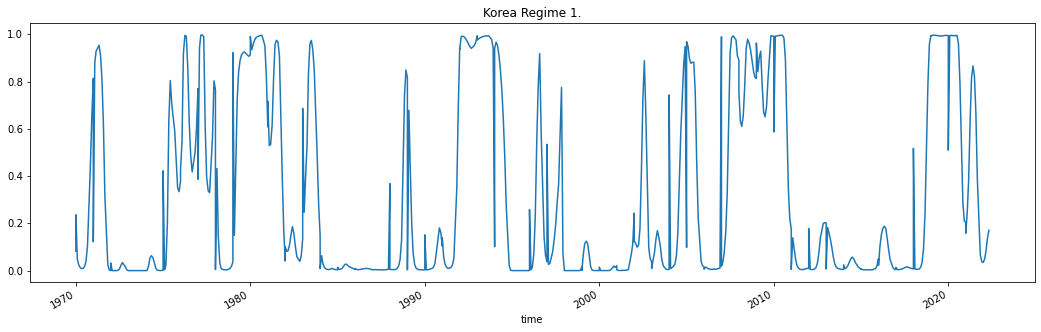

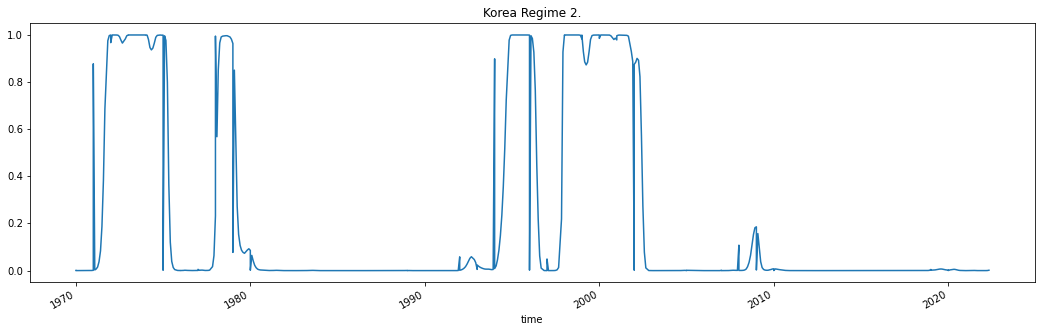

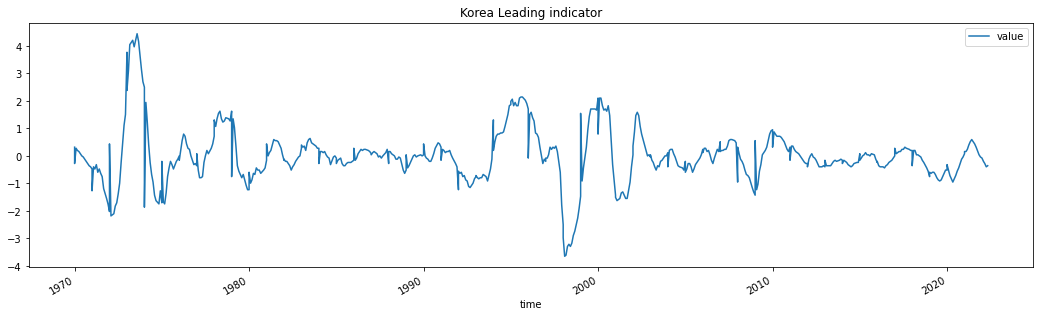

In [22]:
for i in range(N_regimes):
    plt.subplot(N_regimes, 1, i+1)                # nrows=2, ncols=1, 
    kor_model_fit.smoothed_marginal_probabilities[i].plot(title='Korea Regime {}.'.format(i), figsize=(18, 18))
    kor.plot(title='Korea Leading indicator', figsize=(18, 5)) 


In [10]:
#USA

In [11]:
usa_model = sm.tsa.MarkovRegression(usa.dropna(), k_regimes=N_regimes, trend='nc', switching_variance=True)
usa_model_fit = usa_model.fit()
usa_model_fit.summary()


C:\Users\WJ\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:821: FutureWarning: trend 'nc' has been renamed to 'n' after 0.14 is released. Use 'n' now to avoid this warning.
  warnings.warn(
C:\Users\WJ\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                        Markov Switching Model Results                        
==============================================================================
Dep. Variable:                  value   No. Observations:                  810
Model:               MarkovRegression   Log Likelihood                -887.382
Date:                Wed, 27 Jul 2022   AIC                           1792.763
Time:                        13:12:36   BIC                           1835.037
Sample:                    01-01-1955   HQIC                          1808.993
                         - 06-01-2022                                         
Covariance Type:               approx                                         
                             Regime 0 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0364      0.008      4.683      0.000       0.021       0.052
                             Regime 1 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.3464      0.042      8.209      0.000       0.264       0.429
                             Regime 2 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         2.6873      0.284      9.454      0.000       2.130       3.244
                         Regime transition parameters                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
p[0->0]        0.8995      0.000   6434.895      0.000       0.899       0.900
p[1->0]        0.0470      0.015      3.225      0.001       0.018       0.076
p[2->0]     5.646e-14        nan        nan        nan         nan         nan
p[0->1]        0.1005   4.67e-05   2150.826      0.000       0.100       0.101
p[1->1]        0.9091      0.020     45.360      0.000       0.870       0.948
p[2->1]        0.0663      0.018      3.582      0.000       0.030       0.103
==============================================================================

Warnings:
[1] Covariance matrix calculated using numerical (complex-step) differentiation.
"""

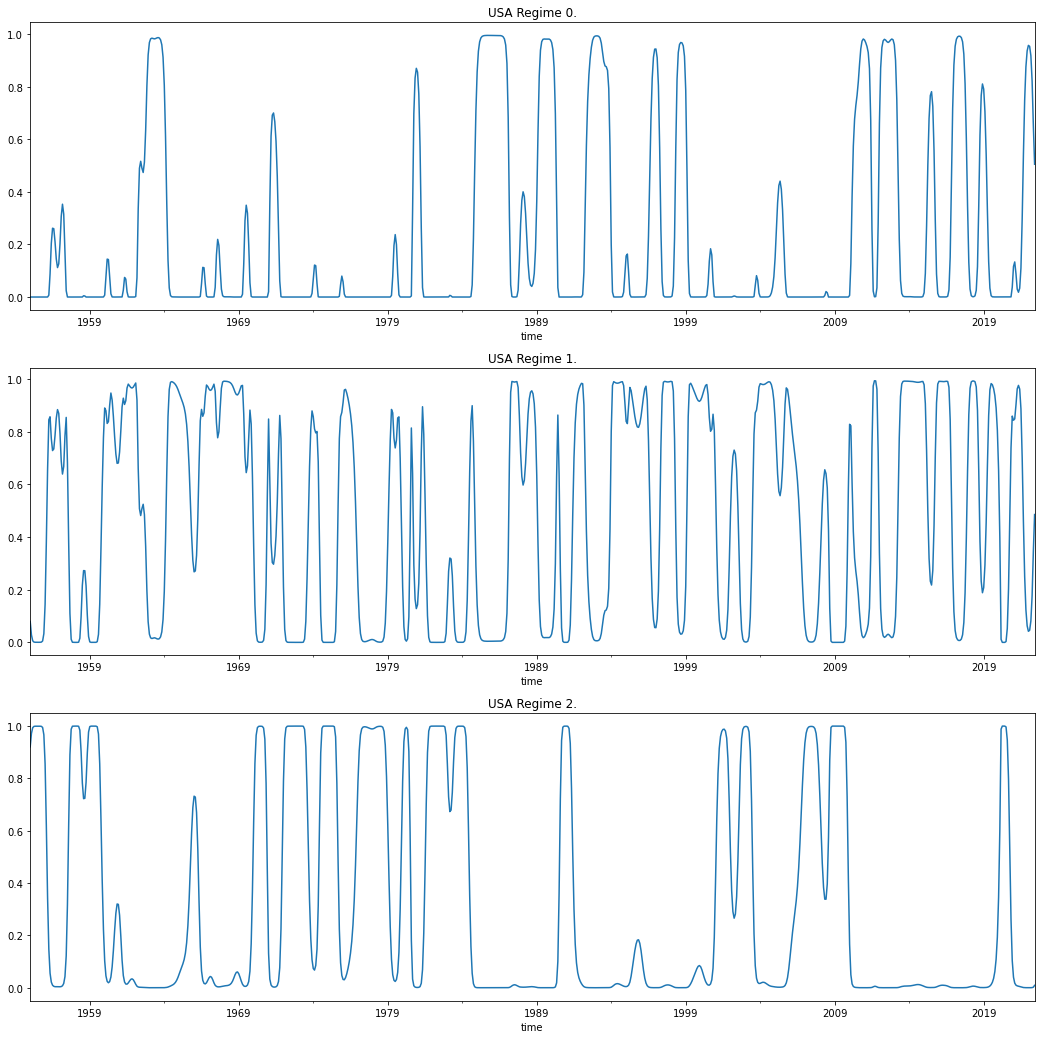

In [12]:
for i in range(N_regimes):
    plt.subplot(N_regimes, 1, i+1)               
    usa_model_fit.smoothed_marginal_probabilities[i].plot(title='USA Regime {}.'.format(i), figsize=(18, 18))

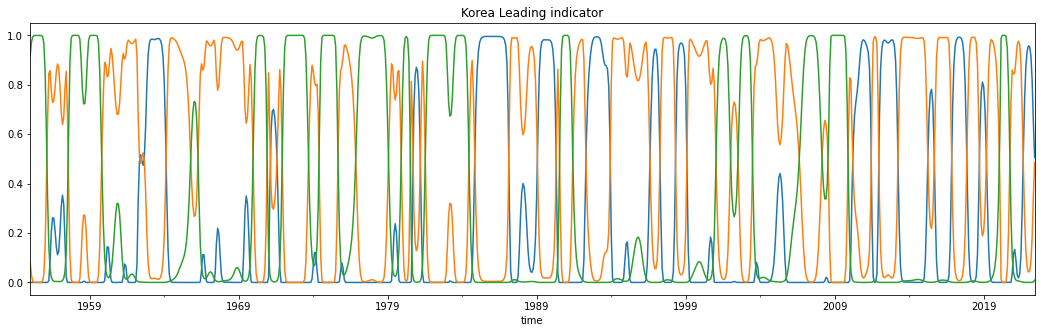

In [21]:
for i in range(N_regimes):
    usa_model_fit.smoothed_marginal_probabilities[i].plot(title='Korea Leading indicator', figsize=(18,5)) 